# 2016 US

In [ ]:
users = []

for line in tqdm(open("disk/user_profile/2016election-all.json")):
    d = json.loads(line.strip())
    face = d["faces"][0]
    # print(face)
    age = face['attributes']["age"]["value"]
    gender = face['attributes']["gender"]["value"]

    if age < 16:
        continue
    elif age >= 18 and age < 30:
        age_range = ">=18, <30"
    elif age >= 30 and age < 50:
        age_range = ">=30, <50"
    elif age >= 50 and age < 65:
        age_range = ">=50, <65"
    elif age >= 65:
        age_range = ">=65"

    users.append({"uid": d["id"], "age": age, "gender": gender, "age_range": age_range})
        
users = pd.DataFrame(users).set_index("uid")
users = users[~users.index.duplicated(keep='first')]

In [6]:
len(users)

708770

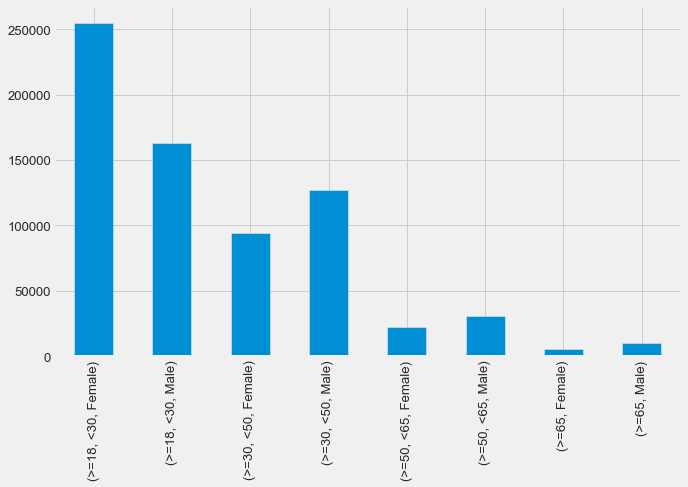

In [7]:
groups = users.groupby(["age_range", "gender"]).size()
groups

sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
groups.plot.bar()
plt.xlabel("")
plt.savefig("web/static/us_twitter_population~.png", bbox_inches = 'tight', dpi=300)

In [8]:
m_15, f_15 = 0, 0
m_30, f_30 = 0, 0
m_50, f_50 = 0, 0
m_65, f_65 = 0, 0

for row in tqdm(users.itertuples()):
    if row.gender == "Male":
        if row.age >= 18 and row.age < 30:
            m_15 += 1
        elif row.age >= 30 and row.age < 50:
            m_30 += 1
        elif row.age >= 50 and row.age < 65:
            m_50 += 1
        elif row.age >= 65:
            m_65 += 1
    elif row.gender == "Female":
        if row.age >= 18 and row.age < 30:
            f_15 += 1
        elif row.age >= 30 and row.age < 50:
            f_30 += 1
        elif row.age >= 50 and row.age < 65:
            f_50 += 1
        elif row.age >= 65:
            f_65 += 1
            
age_gender_dist = {
    "category": [
        "female 18-29", "male 18-29", 
        "female 30-49", "male 30-49", 
        "female 50-64", "male 50-64", 
        "female >=65", "male >=65",
    ],
    "n": [
              f_15, m_15, 
              f_30, m_30, 
              f_50, m_50, 
              f_65, m_65,
         ]
}
age_gender_dist = pd.DataFrame(age_gender_dist).set_index("category")
age_gender_dist["percent"] = age_gender_dist / age_gender_dist.sum()

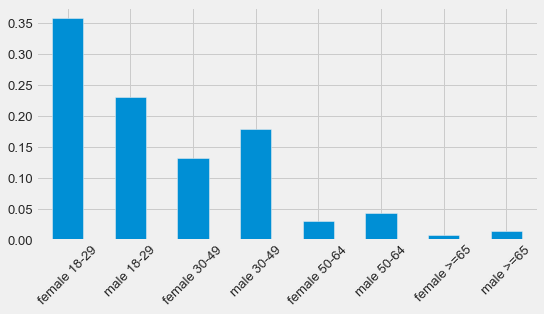

In [9]:
# age_gender_dist['n'].plot.bar(legend=None, color="r")
# plt.title("Distribtuion of population from Twitter")
plt.figure(figsize=(8, 4))
age_gender_dist["percent"].plot.bar(legend=None)
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/us_twitter_population.png", dpi=300, bbox_inches = 'tight')

## Census

                  n   percent
category                     
female 18-29  26382  0.107767
male 18-29    25842  0.105561
female 30-49  41628  0.170045
male 30-49    40385  0.164967
female 50-64  32531  0.132885
male 50-64    30491  0.124552
female >=65   26337  0.107583
male >=65     21210  0.086640


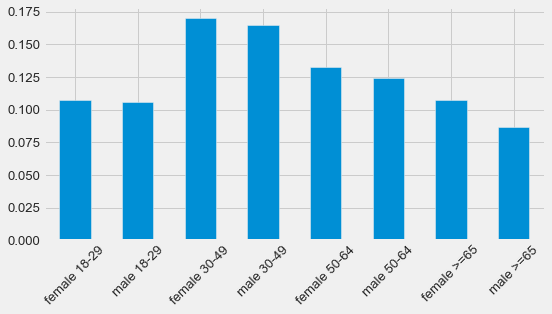

In [82]:
cen = {
    "category": ["female 18-29", "male 18-29", 
                 "female 30-49", "male 30-49", 
                 "female 50-64", "male 50-64", 
                 "female >=65", "male >=65", ],
    "n": [
          26382, 25842,
          41628, 40385,
          32531, 30491,
          26337, 21210
        ]
}
cen = pd.DataFrame(cen).set_index("category")
cen["percent"] = cen / cen.sum()
print(cen)
plt.figure(figsize=(8, 4))
cen["percent"].plot.bar()
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/us_census_population.png", dpi=300, bbox_inches = 'tight')
# plt.title("Distribution of population from Census")

## Voters

                    n   percent
category                       
female 18-29  1163949  0.084630
male 18-29     997958  0.072561
female 30-49  2305648  0.167642
male 30-49    1991257  0.144783
female 50-64  2096909  0.152465
male 50-64    1865974  0.135674
female >=65   1806692  0.131363
male >=65     1525007  0.110882


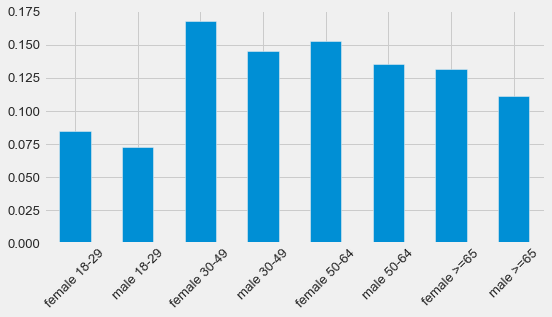

In [76]:
cen = {
    "category": ["female 18-29", "male 18-29", 
                 "female 30-49", "male 30-49", 
                 "female 50-64", "male 50-64", 
                 "female >=65", "male >=65", ],
    "n": [
          1163949, 997958,
          2305648, 1991257,
          2096909, 1865974,
          1806692, 1525007
        ]
}
cen = pd.DataFrame(cen).set_index("category")
cen["percent"] = cen / cen.sum()
print(cen)
plt.figure(figsize=(8, 4))
cen["percent"].plot.bar()
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/us_voter_population.png", dpi=300, bbox_inches = 'tight')
# plt.title("Distribution of population from Census")

In [4]:
# join the opinions

users_opinion = pd.read_pickle("disk/data/df_users_remove_hillary_p=.7.pl")

In [5]:
print("N of classified users:", len(users_opinion))
print("% of users supporting Clinton:", float(users_opinion[users_opinion["Camp"] == "Clinton"].count() / users_opinion.count()) * 100)
print("% of users supporting Clinton:", float(users_opinion[users_opinion["Camp"] == "Trump"].count() / users_opinion.count()) * 100)

N of classified users: 10192653
% of users supporting Clinton: 58.173166495513975
% of users supporting Clinton: 20.06457003883091


In [ ]:
users_v2 = users.join(users_opinion, how="inner")
print("N of classified users with age, gender:", len(users_v2))
print("% of users supporting Clinton:", len(users_v2[users_v2["Camp"] == "Clinton"]) / len(users_v2) * 100)
print("% of users supporting Trump:", len(users_v2[users_v2["Camp"] == "Trump"]) / len(users_v2) * 100)
print("% of users supporting Others:", len(users_v2[users_v2["Camp"] == "Others"]) / len(users_v2) * 100)

In [14]:
groups = users_v2.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp   
>=18, <30  Female  Clinton    194451
                   Others      33424
                   Trump       26889
           Male    Clinton    105070
                   Others      25095
                   Trump       32711
>=30, <50  Female  Clinton     70509
                   Others      10481
                   Trump       13295
           Male    Clinton     85960
                   Others      15453
                   Trump       25739
>=50, <65  Female  Clinton     15883
                   Others       1743
                   Trump        4733
           Male    Clinton     19770
                   Others       2849
                   Trump        8516
>=65       Female  Clinton      3924
                   Others        354
                   Trump        1641
           Male    Clinton      5752
                   Others        778
                   Trump        3750
dtype: int64

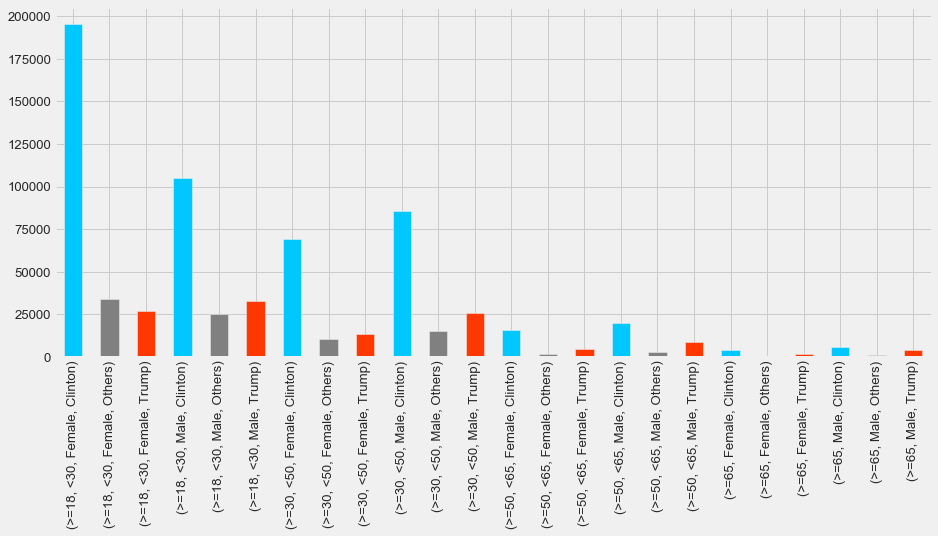

In [124]:
Kc = "#00c8ff";
Mc = "#ff3700";
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 6))
groups.plot.bar(color=[Kc, "grey", Mc])
plt.xlabel("")
plt.savefig("web/static/different_users_us.png", bbox_inches = 'tight', dpi=300)

In [91]:
"""
VOTERS
"""

w = [0.084630, 0.072561, 0.167642, 0.144783, 0.152465, 0.135674, 0.131363, 0.110882]

print("After reweighting!")
print(
+ groups[">=18, <30"]["Female"]["Clinton"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Clinton"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Clinton"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Clinton"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Clinton"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Clinton"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Clinton"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Clinton"] / sum(groups[">=65"]["Male"]) * w[7]
)

print(
+ groups[">=18, <30"]["Female"]["Trump"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Trump"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Trump"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Trump"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Trump"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Trump"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Trump"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Trump"] / sum(groups[">=65"]["Male"]) * w[7]
)

print(
+ groups[">=18, <30"]["Female"]["Others"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Others"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Others"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Others"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Others"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Others"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Others"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Others"] / sum(groups[">=65"]["Male"]) * w[7]
)

After reweighting!
0.667451021234308
0.2587670530246757
0.07378192574101644


In [92]:
"""
CENCUS

                  n   percent
category                     
female 18-29  26382  0.107767
male 18-29    25842  0.105561
female 30-49  41628  0.170045
male 30-49    40385  0.164967
female 50-64  32531  0.132885
male 50-64    30491  0.124552
female >=65   26337  0.107583
male >=65     21210  0.086640
"""

w = [0.107767, 0.105561, 0.170045, 0.164967, 0.132885, 0.124552, 0.107583, 0.086640]

print("After reweighting!")
print(
+ groups[">=18, <30"]["Female"]["Clinton"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Clinton"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Clinton"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Clinton"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Clinton"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Clinton"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Clinton"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Clinton"] / sum(groups[">=65"]["Male"]) * w[7]
)

print(
+ groups[">=18, <30"]["Female"]["Trump"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Trump"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Trump"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Trump"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Trump"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Trump"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Trump"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Trump"] / sum(groups[">=65"]["Male"]) * w[7]
)

print(
+ groups[">=18, <30"]["Female"]["Others"] / sum(groups[">=18, <30"]["Female"]) * w[0] \
+ groups[">=18, <30"]["Male"]["Others"] / sum(groups[">=18, <30"]["Male"]) * w[1] \
+ groups[">=30, <50"]["Female"]["Others"] / sum(groups[">=30, <50"]["Female"]) * w[2] \
+ groups[">=30, <50"]["Male"]["Others"] / sum(groups[">=30, <50"]["Male"]) * w[3] \
+ groups[">=50, <65"]["Female"]["Others"] / sum(groups[">=50, <65"]["Female"]) * w[4] \
+ groups[">=50, <65"]["Male"]["Others"] / sum(groups[">=50, <65"]["Male"]) * w[5] \
+ groups[">=65"]["Female"]["Others"] / sum(groups[">=65"]["Female"]) * w[6] \
+ groups[">=65"]["Male"]["Others"] / sum(groups[">=65"]["Male"]) * w[7]
)

After reweighting!
0.6764945998284931
0.2441002359513026
0.07940516422020433


## Added location (states)

In [50]:
users_state = pd.read_csv("data/us-user-state.csv").set_index("uid")

In [51]:
users_v3_state = users_opinion.join(users_state, on='uid')

In [53]:
users_v3_state = users_v3_state.dropna()

In [ ]:
users_v3_state

In [17]:
users_v3 = users_v3.dropna()

In [18]:
states = ['CA', 'TX', 'NY', 'FL', 'IL', 'GA', 'PA', 'OH', 'DC', 'NC', 'MI', 'MA',
       'IN', 'NJ', 'VA', 'AZ', 'TN', 'WA', 'MD', 'CO', 'MO', 'KY', 'LA', 'MN',
       'OR', 'AL', 'SC', 'NV', 'OK', 'WI', 'IA', 'CT', 'KS', 'AR', 'UT', 'MS',
       'WV', 'NE', 'NM', 'HI', 'NH', 'RI', 'ME', 'ID', 'AK', 'DE', 'MT', 'SD',
       'ND', 'VT', 'WY']

In [ ]:
users_v3

In [158]:
users_tmp = users_v3[users_v3.state=="WY"]

In [163]:
users_v3.Camp.value_counts()

Clinton    185445
Trump       46900
Others      30517
Name: Camp, dtype: int64

In [164]:
users_tmp.Camp.value_counts()

Clinton    182
Trump       69
Others      44
Name: Camp, dtype: int64

In [ ]:
users_tmp

In [159]:
groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp   
>=18, <30  Female  Clinton    48
                   Others     18
                   Trump      16
           Male    Clinton    37
                   Others     10
                   Trump      11
>=30, <50  Female  Clinton    22
                   Others      5
                   Trump       2
           Male    Clinton    52
                   Others      4
                   Trump      19
>=50, <65  Female  Clinton     8
                   Others      2
                   Trump       7
           Male    Clinton     9
                   Others      4
                   Trump       9
>=65       Female  Clinton     3
                   Trump       1
           Male    Clinton     3
                   Others      1
                   Trump       4
dtype: int64

Text(0.5, 0, '')

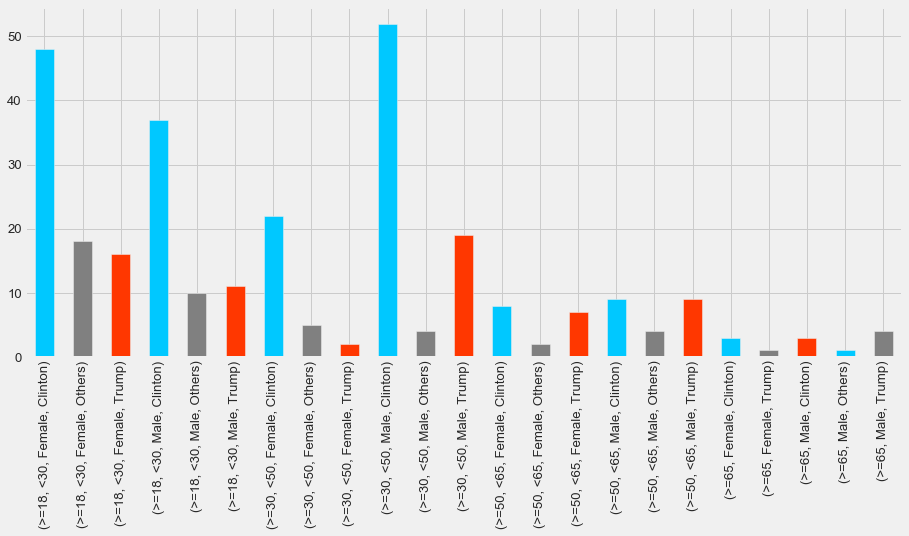

In [160]:
Kc = "#00c8ff";
Mc = "#ff3700";
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 6))
groups.plot.bar(color=[Kc, "grey", Mc])
plt.xlabel("")
# plt.savefig("web/static/different_users_us.png", bbox_inches = 'tight', dpi=300)

In [20]:
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')

for _state in states:
    # print(_state)
    users_tmp = users_v3[users_v3.state==_state]
    Kc = "#00c8ff";
    Mc = "#ff3700";
    plt.figure(figsize=(14, 6))
    groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
    groups.plot.bar(color=[Kc, "grey", Mc])
    plt.xlabel(_state)
    plt.savefig(f"fig/different_users_{_state}.png", bbox_inches = 'tight', dpi=300)
    plt.close()

### remove users who is located in counties

maybe the rural users

In [60]:
users_v3_state = users_v3_state[~users_v3_state.index.isin(users_v3.index)]

In [ ]:
users_v3_state

In [68]:
states_users = {}
for row in tqdm(users_v3_state.itertuples()):
    if row.state not in states_users:
        states_users[row.state] = [0, 0]
    if row.Camp=="Clinton":
        states_users[row.state][0] += 1
    elif row.Camp=="Trump":
        states_users[row.state][1] += 1

In [ ]:
states_users

In [ ]:
state_users_gap

In [70]:
state_users_gap = {}

for loc, v in states_users.items():
    # print(v[0] + v[1])
    if v[0] + v[1] > 0:
        state_users_gap[loc] = round(v[0] / (v[0] + v[1]) - v[1] / (v[0] + v[1]), 3)

In [ ]:
original_data = json.load(open("data/us-counties-unemployment.json"))
for d in original_data:
    d['value'] = 0
    d["name"] = d["name"].replace(" County", "").replace(" Municipio", "")

## Added location (counties)

In [46]:
users_county = pd.read_csv("data/us-user-county.csv").set_index("uid")

In [47]:
users_v3 = users_opinion.join(users_county, on='uid')

In [48]:
users_v3 = users_v3.dropna()

In [37]:
county_users = {}
for row in tqdm(users_v3.itertuples()):
    if row.loc not in county_users:
        county_users[row.loc] = [0, 0]
    if row.Camp=="Clinton":
        county_users[row.loc][0] += 1
    elif row.Camp=="Trump":
        county_users[row.loc][1] += 1

In [38]:
county_users_gap = {}

for loc, v in county_users.items():
    # print(v[0] + v[1])
    if v[0] + v[1] > 0:
        county_users_gap[loc] = round(v[0] / (v[0] + v[1]) - v[1] / (v[0] + v[1]), 3)

In [25]:
county_users_gap = sorted(county_users_gap.items(), key=lambda d:d[1], reverse=True)

In [28]:
for loc, v in county_users_gap:
    print(loc, v, sep="\t", file=open("data/us-county-users-gap.txt", "w"))

In [39]:
original_data = json.load(open("data/us-counties-unemployment.json"))
for d in original_data:
    d['value'] = 0
    d["name"] = d["name"].replace(" County", "").replace(" Municipio", "")

In [40]:
# match
for d in original_data:
    if d['name'] in county_users_gap:
        d['value'] = county_users_gap[d["name"]]

In [44]:
final_data = []

for v in original_data:
    if v['value'] != 0:
        final_data.append(v)

In [45]:
json.dump(final_data, open("web/data/us-county-opinion.json", "w"), indent=2)

## Urban and rural opinions